In [1]:
import pyfedwatch as fw
from pyfedwatch.datareader import read_price_history, get_fedfunds_range
from pyfedwatch.datareader import read_fomc_data, get_fomc_data

In [2]:
# Get FOMC meetings data

# Option 1: Use read_fomc_data and create a list
fomc_data_1 = read_fomc_data(path = '../data/fomc')
fomc_dates_1 = fomc_data_1['FOMCDate'].to_list()

# Option 2: (Recommended) Use get_fomc_data and create a list
fomc_data_2 = get_fomc_data()
fomc_dates_2 = fomc_data_2[(fomc_data_2['Status'] == 'Scheduled') | (fomc_data_2['Status'] == 'Cancelled')].index.tolist()

In [3]:
# Get Fed Funds target rate upper and lower limits
ff_range = get_fedfunds_range()
ff_range

,LL,UL
Date,,
1982-09-27,10.25,10.25
1982-09-28,10.25,10.25
1982-09-29,10.25,10.25
1982-09-30,10.25,10.25
1982-10-01,10.00,10.00
...,...,...
2023-09-15,5.25,5.50
2023-09-16,5.25,5.50
2023-09-17,5.25,5.50


In [4]:
# Read one of the fed funds futures contracts pricing data
ohlc_sample = read_price_history(symbol='ZQJ22', path='../data/contracts')
ohlc_sample

,Open,High,Low,Close,Volume,OpenInterest,Symbol
Date,,,,,,,
2019-04-30,98.1050,98.1050,98.1050,98.1050,0,0,ZQJ22
2019-05-01,98.0650,98.0650,98.0650,98.0650,0,0,ZQJ22
2019-05-02,98.0000,98.0000,98.0000,98.0000,0,0,ZQJ22
2019-05-03,98.0050,98.0050,98.0050,98.0050,0,0,ZQJ22
2019-05-06,98.0450,98.0450,98.0450,98.0450,0,0,ZQJ22
...,...,...,...,...,...,...,...
2022-04-25,99.6675,99.6700,99.6675,99.6675,6246,515693,ZQJ22
2022-04-26,99.6675,99.6725,99.6675,99.6700,14986,517171,ZQJ22
2022-04-27,99.6700,99.6725,99.6700,99.6700,2828,515175,ZQJ22


In [5]:
# Testing FOMC class
fomc = fw.fomc.FOMC(watch_date = '2023-03-10',
                    fomc_dates = fomc_dates_2,
                    num_upcoming = 9)

fomc.summary

,Contract,Meeting,Order
YYYY-MM,,,
2023-01,ZQF23,No FOMC,0
2023-02,ZQG23,2023-02-01,-1
2023-03,ZQH23,2023-03-22,1
2023-04,ZQJ23,No FOMC,0
2023-05,ZQK23,2023-05-03,2
2023-06,ZQM23,2023-06-14,3
2023-07,ZQN23,2023-07-26,4
2023-08,ZQQ23,No FOMC,0
2023-09,ZQU23,2023-09-20,5


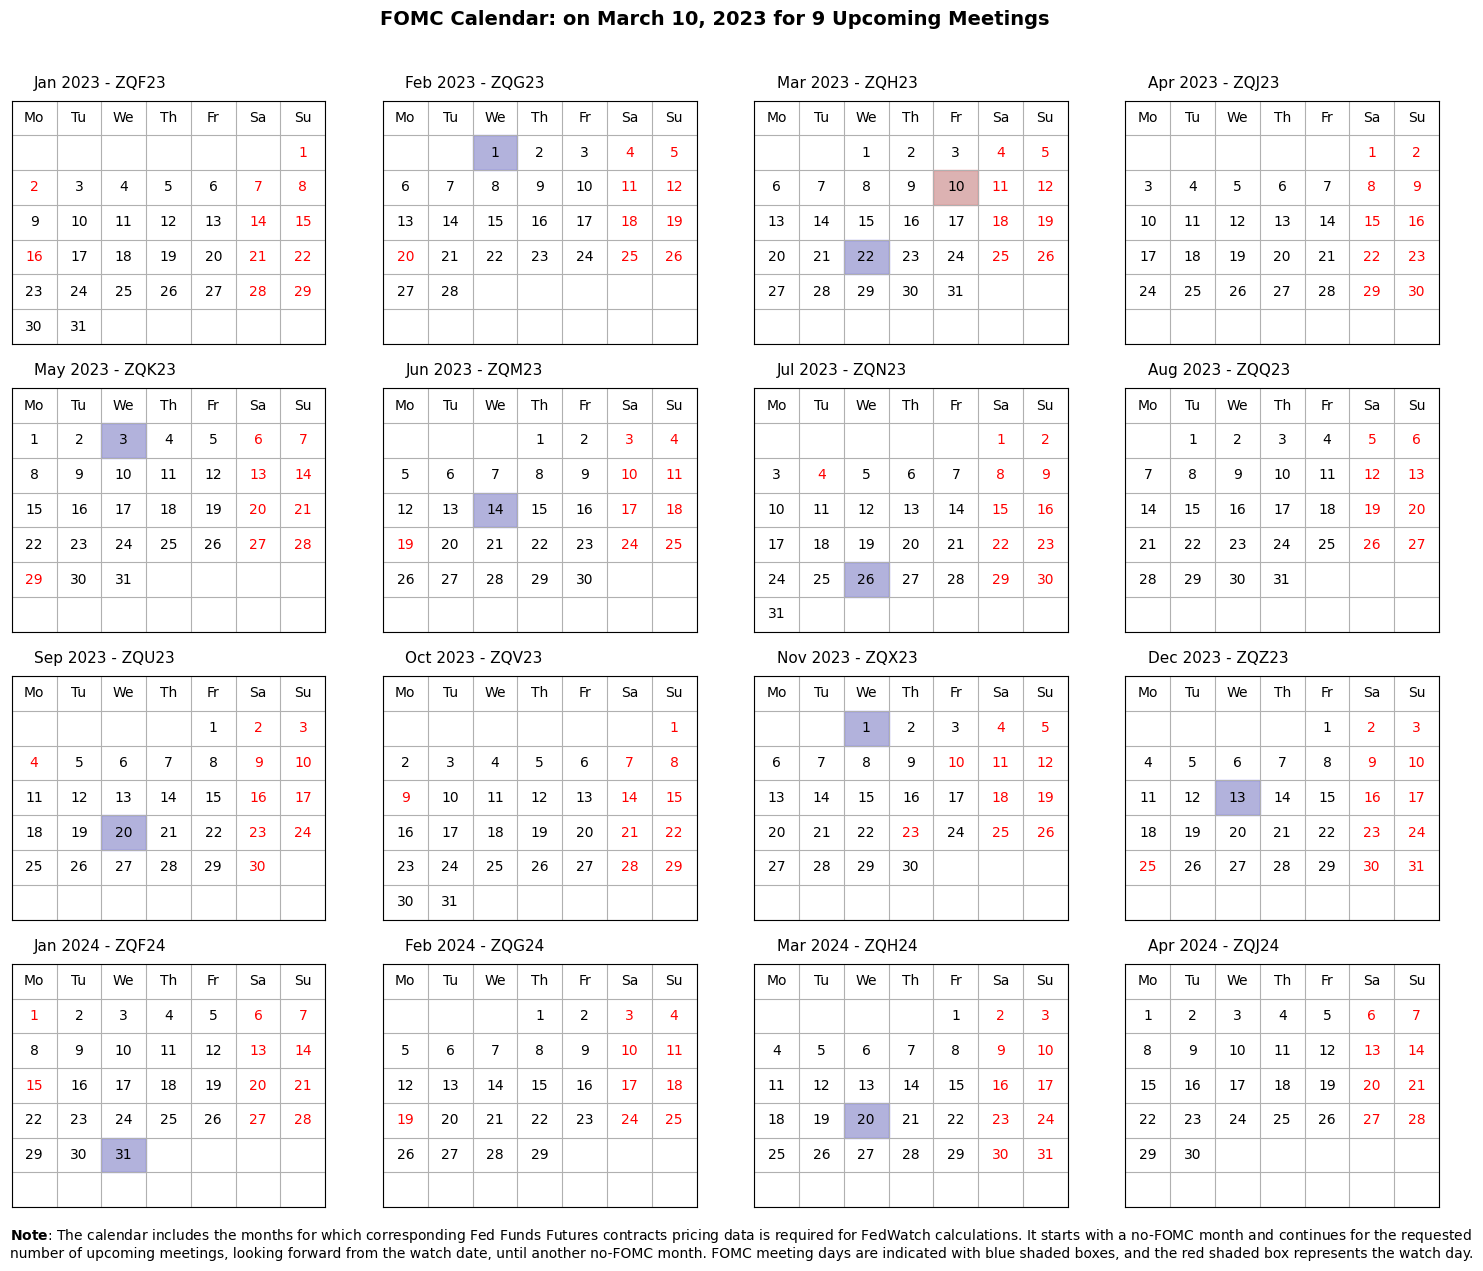

In [6]:
# Plot FOMC calendar
fig = fomc.plot_fomc_calendar()

In [7]:
# Calculate rate expectations
fedwatch = fw.fedwatch.FedWatch(watch_date = '2023-03-10',
                                fomc_dates = fomc_dates_2,
                                num_upcoming = 9,
                                user_func = read_price_history,
                                path = '../data/contracts')

fedwatch.generate_hike_info(rate_cols=True).style.format("{:.1%}").background_gradient(axis=1)